In [1]:
from tensorflow.keras.datasets import cifar10

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [2]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)


Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3762 - loss: 1.7645 - val_accuracy: 0.5410 - val_loss: 1.3072
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5150 - loss: 1.3887 - val_accuracy: 0.5617 - val_loss: 1.2492
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5335 - loss: 1.3311 - val_accuracy: 0.5712 - val_loss: 1.2205


In [5]:
predictions = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


In [6]:
# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Classification report
from sklearn.metrics import classification_report
import numpy as np
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Test Accuracy:", test_accuracy)
print(classification_report(y_true, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5634 - loss: 1.2420
Test Accuracy: 0.5638999938964844
              precision    recall  f1-score   support

           0       0.72      0.56      0.63      1000
           1       0.59      0.66      0.62      1000
           2       0.58      0.32      0.41      1000
           3       0.43      0.35      0.38      1000
           4       0.45      0.62      0.52      1000
           5       0.51      0.53      0.52      1000
           6       0.57      0.70      0.63      1000
           7       0.62      0.61      0.62      1000
           8       0.64      0.71      0.68      1000
           9       0.58      0.57      0.58      1000

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.57      0.56      0.56     10000



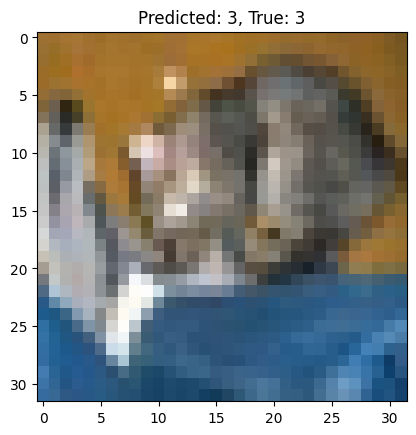

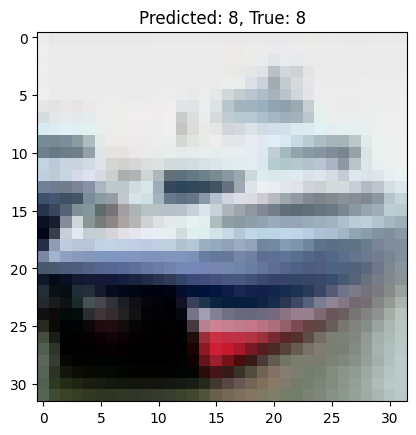

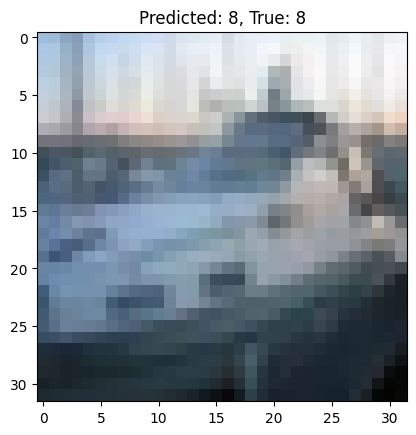

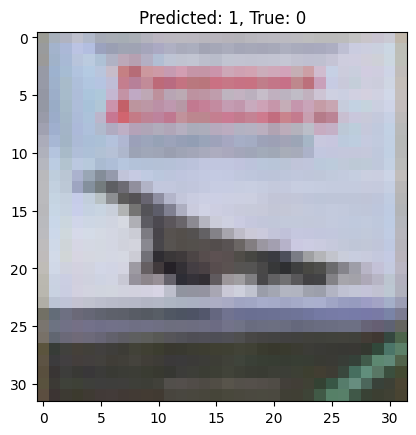

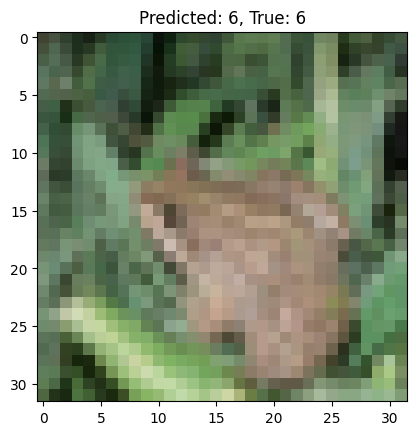

In [7]:
import matplotlib.pyplot as plt

# Visualize predictions
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
    plt.show()
